In [74]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [75]:
import pandas as pd # Python에서 테이블화 된 데이터를 다루는데 가장 최적화 된 라이브러리입니다.
import numpy as np # numpy는 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 하는 라이브러리입니다.
import matplotlib.pyplot as plt
import seaborn as sns # matplotlib을 기반으로 한 Visualization libarary 입니다.

import missingno as msno # NaN 값이 있는지 시각적으로 표현해주는 라이브러리입니다.

sns.set(style='white', context='notebook', palette='deep', font_scale=2.5)

In [76]:
data = pd.read_csv("/gdrive/MyDrive/Colab/SleepHelper/SampleData.csv")
data.columns
data.count()

TIB       2716
TST       2716
SE        2716
BI        2716
BO        2716
SOL       2716
WASO_N    2716
WASO_T    2716
수면제       2716
커피        2716
알콜        2716
낮잠        2716
Q         2716
C         2716
dtype: int64

In [77]:
# labels = data["Q"]
# data = data.drop(labels = ["Q"], axis = 1)

In [78]:
# labels.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


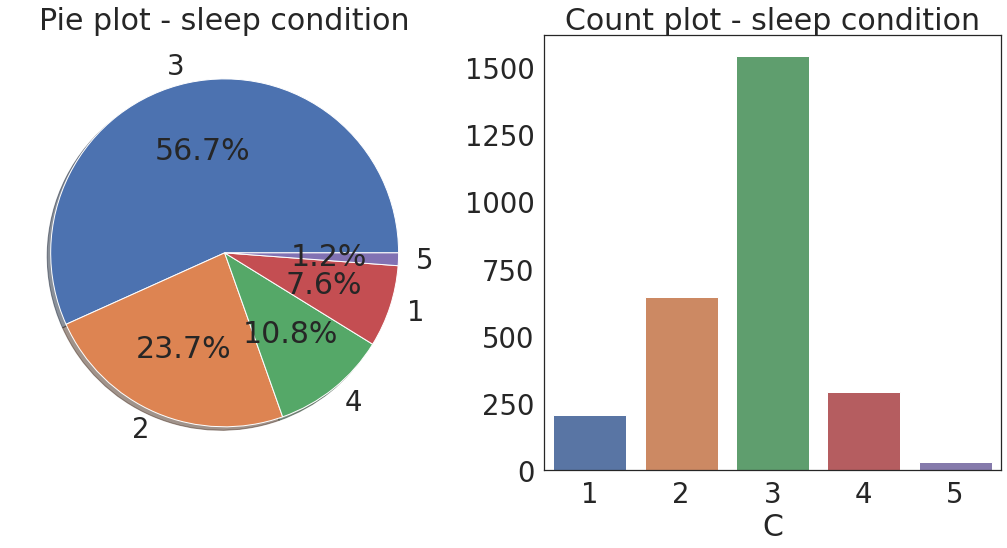

In [79]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data["C"].value_counts().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%')
ax[0].set_title('Pie plot - sleep condition')
ax[0].set_ylabel('')
sns.countplot('C', data=data, ax=ax[1])
ax[1].set_title('Count plot - sleep condition')
ax[1].set_ylabel('')

plt.show()

In [92]:

x_data, y_data = data.drop(['Q'], axis=1), data['Q']

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

# print(x_data)
# print()
# print(y_data)

# Normalize
# x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

number_of_train = int(len(x)*0.8)

train_x = x[:number_of_train]
train_y = y_data[:number_of_train]
test_x = x[number_of_train:]
test_y = y_data[number_of_train:]

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(train_x, train_y) # 학습시킵시다.
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(test_x, test_y)*100))

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x, train_y)
print("Test Accuracy of Logistic Regression {:.2f}%".format(lr.score(test_x, test_y) * 100))

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_x, train_y)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(test_x, test_y)*100))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(test_x, test_y)*100))

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(train_x, train_y)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(test_x, test_y)*100))


Test Accuracy of SVM Algorithm: 73.90%
Test Accuracy of Logistic Regression 67.46%
Accuracy of Naive Bayes: 10.85%
Decision Tree Test Accuracy 57.90%
Random Forest Algorithm Accuracy Score : 71.51%
2 NN Score: 0.00%
